## Bayes Classifier
The Bayes Classifier is a fundamental probabilistic model in machine learning that applies Bayes' Theorem to predict the category or class of a given data point. It leverages prior knowledge along with observed data to calculate the probability of each class, ultimately assigning the data point to the class with the highest probability. This approach is particularly powerful in scenarios where the relationships between features and the class label are probabilistic and uncertain. The Bayes Classifier is known for its simplicity, computational efficiency, and effectiveness in a variety of applications, including text classification, spam filtering, and sentiment analysis.

Contents of this section:
*   Implementing simplified rule-base spam classifier (recap)
*   Implementing binary naive Bayes classifier (no smoothing)
*   Implementing binary naive Bayes classifier (Laplace smoothing)
*   Observe the effect of Laplace smoothing

### Setting Environment

In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/devrok/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
!wget -O spam_dataset.tsv https://drive.google.com/uc?id=1Ua1q2hOfN25B6H8PDWXl4yViE_cNj3mp

--2024-08-15 03:32:26--  https://drive.google.com/uc?id=1Ua1q2hOfN25B6H8PDWXl4yViE_cNj3mp
Resolving drive.google.com (drive.google.com)... 142.250.207.110, 2404:6800:400a:805::200e
Connecting to drive.google.com (drive.google.com)|142.250.207.110|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Ua1q2hOfN25B6H8PDWXl4yViE_cNj3mp [following]
--2024-08-15 03:32:26--  https://drive.usercontent.google.com/download?id=1Ua1q2hOfN25B6H8PDWXl4yViE_cNj3mp
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.76.129, 2404:6800:400a:804::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.76.129|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5500631 (5.2M) [application/octet-stream]
Saving to: ‘spam_dataset.tsv’

spam_dataset.tsv    100%[===================>]   5.25M  15.6MB/s    in 0.3s    

2024-08-15 03:32:30 (15.6 MB/s) - ‘s

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('spam_dataset.tsv', sep="\t")
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [4]:
X = df['text']
y = df['label_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
list(zip(X_train, y_train))[:2]

[('Subject: april activity surveys\r\nwe are starting to collect data for april . the attached survey drives your\r\ncosts from your activities to the commercial teams . please select your rcs ,\r\nand fill in the driver quantity for the requested driver for the month of\r\nfebruary . please fill out the attached activity driver survey with april\r\nnumbers for your rc by end of day thursday , may 4 th .\r\nif your group currently generates a standard report that captures the\r\nsurveyed data , please send the report to me , and put me on your recipient\r\nlist beginning next month . this will eliminate your need to fill out this\r\nsurvey every month . if you would like us to collect this information from\r\nsomeone within your team beginning next month , let me know .\r\nplease contact me or lisa cousino x 3 - 6343 if you are unable to complete the\r\nsurvey within the allotted time .\r\nthanks ,\r\nshari\r\n3 - 3859',
  0),
 ("Subject: message subject\r\nhey i ' am julie ^ _ ^ . i j

## Practice: Spam Filtering

In [6]:
import re
from collections import defaultdict, Counter
from nltk.corpus import stopwords

def tokenize(text):
    output =  re.findall(r'\b\w+\b', text.lower())
    # remove stopword
    output = [word for word in output if word not in stopwords.words('english')]
    return output


# Example
print(tokenize("Win a free iPhone now"))  # Output: ['win', 'a', 'free', 'iphone', 'now']

['win', 'free', 'iphone']


In [7]:
list(zip(X_train, y_train))[:2]

[('Subject: april activity surveys\r\nwe are starting to collect data for april . the attached survey drives your\r\ncosts from your activities to the commercial teams . please select your rcs ,\r\nand fill in the driver quantity for the requested driver for the month of\r\nfebruary . please fill out the attached activity driver survey with april\r\nnumbers for your rc by end of day thursday , may 4 th .\r\nif your group currently generates a standard report that captures the\r\nsurveyed data , please send the report to me , and put me on your recipient\r\nlist beginning next month . this will eliminate your need to fill out this\r\nsurvey every month . if you would like us to collect this information from\r\nsomeone within your team beginning next month , let me know .\r\nplease contact me or lisa cousino x 3 - 6343 if you are unable to complete the\r\nsurvey within the allotted time .\r\nthanks ,\r\nshari\r\n3 - 3859',
  0),
 ("Subject: message subject\r\nhey i ' am julie ^ _ ^ . i j

### Rule-based Classifier and Evaluation


In [8]:
def keyword_classify(document, keywords=['million','millions']):
    words = tokenize(document)
    # DIY
    # return 1 if the words include keyword, 0 otherwise
    return 1 if any(keyword in words for keyword in keywords) else 0

In [9]:
example = 'Congratulations! You won a millions dollars!'
result = keyword_classify(example)
if result == 1:
    print("Spam")
else:
    print("Not Spam")

Spam


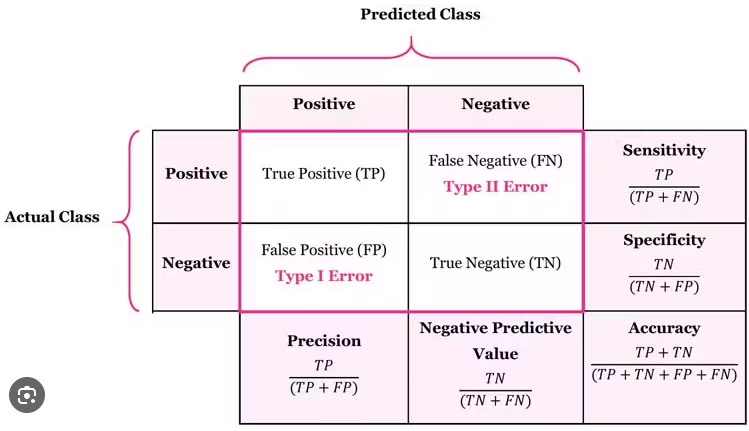

In [29]:
def evaluate_classification_result(y_true, y_pred):
    # DIY
    # (1) Compute TP, TN, FP, FN
    # (2) Compute and print Accuracy Precision, Recall, F1
    # (3) Print Confusion Matrix
    # Hint - access i-th elements of each input with y_pred[i], y_true.iloc[i]
    true_positive = 1
    false_positive = 1
    true_negative = 1
    false_negative = 1

    # Your code here
    for i in range(len(y_pred)):
        if y_pred[i] == y_true.iloc[i]:
            if y_pred[i] == 1:
                true_positive += 1
            else:
                true_negative += 1
        else:
            if y_pred[i] == 1:
                false_positive += 1
            else:
                false_negative += 1

    # Accuracy
    print(f"true_positive:{true_positive}, true_negative:{true_negative}, false_positive:{false_positive}, false_negative:{false_negative}")
    accuracy = 100*(true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)
    print("Accuracy:", accuracy)

    # Precision
    precision = 100*(true_positive / (true_positive + false_positive))
    print("Precision:", precision)

    # Recall
    recall = 100*(true_positive / (true_positive + false_negative))
    print("Recall:", recall)

    # F1
    f1 = 2 * (precision * recall) / (precision + recall)
    print("F1:", f1)

    # Confusion Matrix
    print("Confusion Matrix:")
    print("Pred\t0\t1")
    print("Actual")
    print("0\t", true_negative, "\t", false_positive)
    print("1\t", false_negative, "\t", true_positive)
    return accuracy, precision, recall, f1

In [11]:
# Inference on test set
y_pred = [keyword_classify(text,keywords=['million','millions']) for text in X_test]
acc_rule, prec_rule, rec_rule, f1_rule = evaluate_classification_result(y_test, y_pred)

true_positive 23, true_negative:738, false_positive:4, false_negative270
Accuracy: 73.52657004830918
Precision: 85.18518518518519
Recall: 7.849829351535837
F1: 14.375000000000002
Confusion Matrix:
Pred	0	1
Actual
0	 738 	 4
1	 270 	 23


### Naive Bayes (without smoothing)
The Naive Bayes classifier is a specific type of Bayes Classifier that makes a strong assumption: it assumes that the features of a data point are conditionally independent given the class label. Despite this "naive" assumption, which rarely holds true in real-world scenarios, the Naive Bayes classifier often performs remarkably well in practice. It is particularly well-suited for high-dimensional data and is widely used in text classification tasks such as email spam detection and document categorization.

In [12]:
def train_naive_bayes(data):
    class_counts = Counter() # Counter extends dict, providing useful methods for counting word occurence
    word_counts = defaultdict(Counter)
    vocab = set()

    for text, label in data:
        class_counts[label] += 1
        words = tokenize(text)
        for word in words:
            word_counts[label][word] += 1
            vocab.add(word)

    return class_counts, word_counts, vocab

data = list(zip(X_train, y_train))
class_counts, word_counts, vocab = train_naive_bayes(data)
print(class_counts) # class 개수
#print(word_counts[0])
#print(vocab) # 단어의 vocab set

Counter({0: 2930, 1: 1206})


In [13]:
len(word_counts[1])

34129

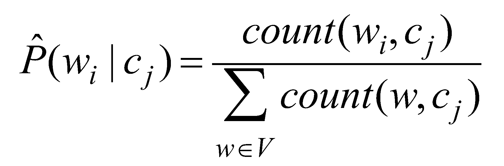

In [14]:
def calculate_probabilities_ns(class_counts, word_counts, vocab):
    total_docs = sum(class_counts.values())
    class_probs = {label: count / total_docs for label, count in class_counts.items()}
    word_probs = defaultdict(dict)

    for label, words in word_counts.items():
        # DIY
        # compute conditional probability for each world: P(w|c)
        # word_probs[label][word] = (condition probability)
        # Your code here
        total_words = sum(words.values())
        for word in vocab:
          word_probs[label][word] = words[word] / total_words

    return class_probs, word_probs

In [15]:
class_probs_ns, word_probs_ns = calculate_probabilities_ns(class_counts, word_counts, vocab)

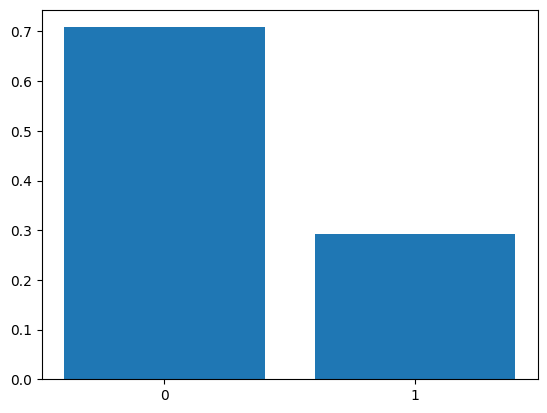

In [16]:
# bar plot for class_probs
plt.bar(["0","1"], [class_probs_ns[0], class_probs_ns[1]])
plt.show() # class imbalance!!

Now that we have P(w|c) for each class c and word w, we can examine the strongest predicting factors.

In [17]:
# Top-15 words for Spam (Class 1)
word_probs_spam = sorted(list(word_probs_ns[1].items()), key=lambda x: x[1], reverse=True)
top_spam_word = word_probs_spam[:15]
for word, prob in top_spam_word:
    print(prob,'\t',word)

0.00838747487223437 	 subject
0.00561475590620648 	 3
0.005066513747014601 	 com
0.004782940216398112 	 _
0.004215793155165134 	 http
0.004033045768767842 	 2
0.0038818065524390474 	 1
0.0038250918463157498 	 company
0.003283151321137571 	 00
0.0032453415170553726 	 e
0.003226436615014273 	 0
0.0030373875946032806 	 www
0.0027790206000415907 	 information
0.002640384651740196 	 email
0.0025899715796305982 	 price


In [18]:
# Top-15 words for Ham (Class 0)
word_probs_ham = sorted(list(word_probs_ns[0].items()), key=lambda x: x[1], reverse=True)
top_ham_word = word_probs_ham[:15]
for word, prob in top_ham_word:
    print(prob,'\t',word)

0.034796794374912836 	 ect
0.018233533225441325 	 hou
0.016394612318499802 	 enron
0.01633299063026014 	 subject
0.01103028219489967 	 2000
0.007530818952236705 	 com
0.00723892674478567 	 gas
0.007099467134559064 	 deal
0.007018385965822666 	 please
0.006042168694236426 	 hpl
0.005996763239744043 	 meter
0.0059156820710076444 	 cc
0.005880006356763629 	 pm
0.005211897526375704 	 2001
0.005056221682401819 	 1


In [19]:
top_ham_word[0][0]

'ect'

In [20]:
# Top-15 predictors: words with largest P(w|spam) - P(w|ham)
# DIY
# diff_word_probs is a list of tuple (word, prob diff)
diff_word_probs = [(word, word_probs_ns[1][word] - word_probs_ns[0][word]) for word in vocab] # Your code here
top_diff_word = sorted(diff_word_probs, key=lambda x: x[1], reverse=True)

for word, prob in top_diff_word[:15]:
    print(prob,'\t',word)

0.003567143805273945 	 http
0.002621847302267594 	 company
0.002599549283426728 	 www
0.0025708818181042867 	 font
0.0025035130743065606 	 statements
0.002268588244931911 	 nbsp
0.0019030934721373251 	 pills
0.0017841675098838265 	 email
0.0016414832308261794 	 2004
0.0015395479296957104 	 size
0.0014544840762690074 	 money
0.001449375823150943 	 td
0.0014309576870976046 	 within
0.0014068438964375915 	 investment
0.0013758324046675586 	 3


Now, let's implement the classification with conditional probabilities.

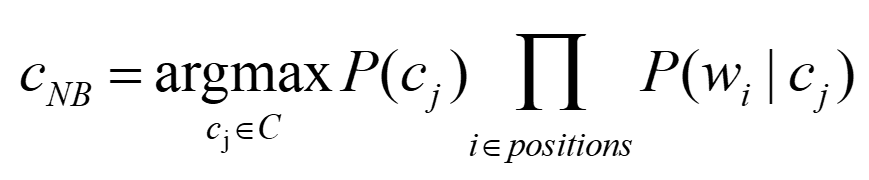

In [21]:
def classify_ns(document, class_probs, word_probs, vocab):
    words = tokenize(document)
    scores = {label: class_probs[label] for label in class_probs}

    for label in scores:
        for word in words:
            # DIY
            # compute score for each label, using word_probs
            # hint: you should handle the edge case where 'word' is not in our vocabulary (i.e. unseen word)
            scores[label] *= word_probs[label].get(word, 0)

    return max(scores, key=scores.get)

In [22]:
# Example
result = classify_ns("Win a free coffee now", class_probs_ns, word_probs_ns, vocab)
if result == 0:
    print("Not Spam")
else:
    print("Spam")

Spam


In [23]:
# Inference on test set
y_pred_ns = [classify_ns(text, class_probs_ns, word_probs_ns, vocab) for text in X_test]
acc_ns, prec_ns, rec_ns, f1_ns = evaluate_classification_result(y_test, y_pred_ns)

true_positive 32, true_negative:739, false_positive:3, false_negative261
Accuracy: 74.4927536231884
Precision: 91.42857142857143
Recall: 10.921501706484642
F1: 19.51219512195122
Confusion Matrix:
Pred	0	1
Actual
0	 739 	 3
1	 261 	 32


### Naive Bayes with Laplace smoothing

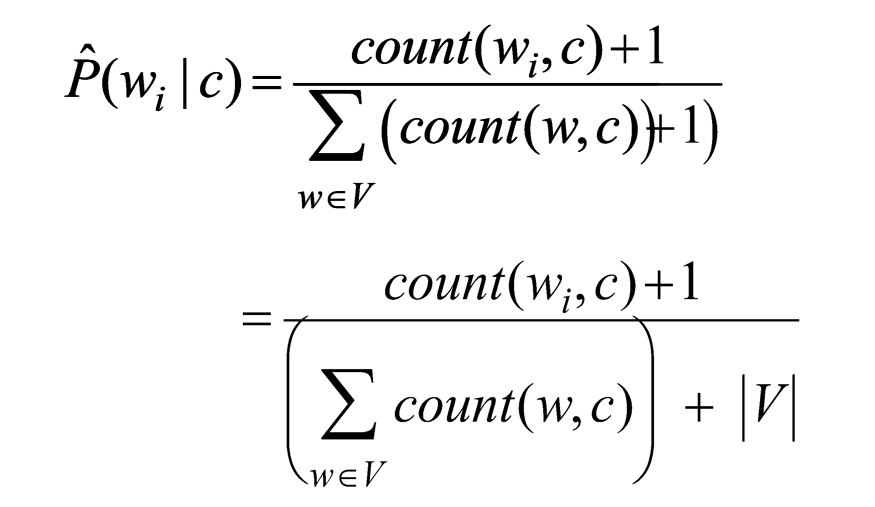

In [24]:
def calculate_probabilities(class_counts, word_counts, vocab):
    total_docs = sum(class_counts.values())
    class_probs = {label: count / total_docs for label, count in class_counts.items()}
    word_probs = defaultdict(dict)

    for label, words in word_counts.items():
        total_words = sum(words.values())
        # DIY
        # implement laplace smoothing
        for word in vocab:
          word_probs[label][word] = (words[word] + 1) / (total_words + len(vocab))

    return class_probs, word_probs

In [25]:
def classify(document, class_probs, word_probs, vocab):
    words = tokenize(document)
    scores = {label: class_probs[label] for label in class_probs}

    # DIY
    # compute score for each label, using laplace smoothing
    for label in scores:
      total_words = sum(word_probs[label].values())
      scores[label] *= word_probs[label].get(word, total_words + len(vocab))

    return max(scores, key=scores.get)

In [30]:
# Inference on test set
class_probs_ls, word_probs_ls = calculate_probabilities(class_counts, word_counts, vocab)
y_pred_ls = [classify(text, class_probs_ls, word_probs_ls, vocab) for text in X_test]
acc_ls, prec_ls, rec_ls, f1_ls = evaluate_classification_result(y_test, y_pred_ls)

true_positive:1, true_negative:743, false_positive:1, false_negative:294
Accuracy: 71.60731472569779
Precision: 50.0
Recall: 0.3389830508474576
F1: 0.6734006734006732
Confusion Matrix:
Pred	0	1
Actual
0	 743 	 1
1	 294 	 1


### Visualization

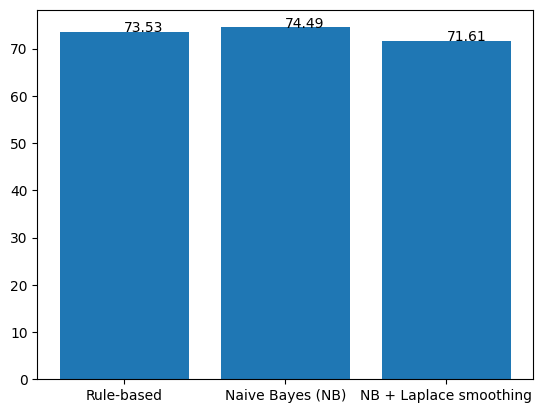

In [31]:
# visualize the results
import matplotlib.pyplot as plt

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],round(y[i],2))

# compare accuracy
x = ['Rule-based', 'Naive Bayes (NB)', 'NB + Laplace smoothing']
y = [acc_rule, acc_ns, acc_ls]
plt.bar(x, y)
addlabels(x, y)
plt.show()

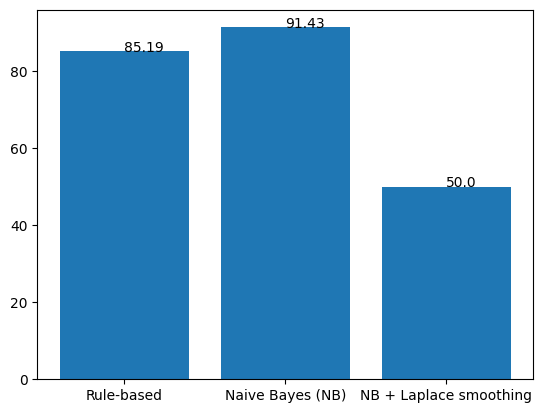

In [32]:
# compare precision
x = ['Rule-based', 'Naive Bayes (NB)', 'NB + Laplace smoothing']
y = [prec_rule, prec_ns, prec_ls]
plt.bar(x, y)
addlabels(x, y)
plt.show()

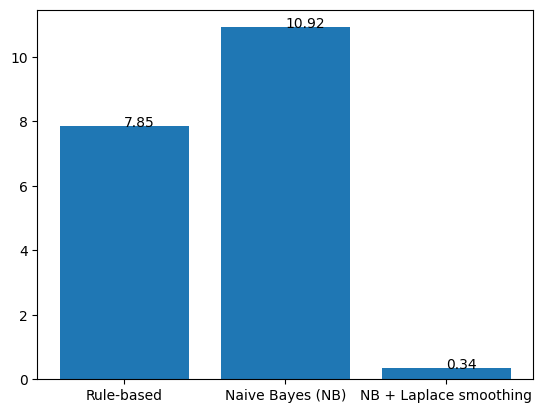

In [33]:
# compare recall
x = ['Rule-based', 'Naive Bayes (NB)', 'NB + Laplace smoothing']
y = [rec_rule, rec_ns, rec_ls]
plt.bar(x, y)
addlabels(x, y)
plt.show()

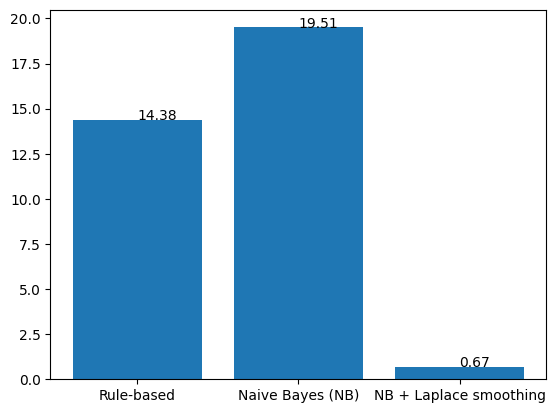

In [34]:
# compare f1
x = ['Rule-based', 'Naive Bayes (NB)', 'NB + Laplace smoothing']
y = [f1_rule, f1_ns, f1_ls]
plt.bar(x, y)
addlabels(x, y)
plt.show()

### Naive Bayes with Scikit-Learn

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [36]:
vectorizer.vocabulary_

{'subject': 39174,
 'april': 6223,
 'activity': 4617,
 'surveys': 39475,
 'we': 43448,
 'are': 6335,
 'starting': 38749,
 'to': 40788,
 'collect': 11830,
 'data': 13854,
 'for': 18947,
 'the': 40346,
 'attached': 6779,
 'survey': 39472,
 'drives': 15777,
 'your': 44820,
 'costs': 12911,
 'from': 19294,
 'activities': 4616,
 'commercial': 11973,
 'teams': 40014,
 'please': 32435,
 'select': 36925,
 'rcs': 34424,
 'and': 5795,
 'fill': 18482,
 'in': 22908,
 'driver': 15775,
 'quantity': 34024,
 'requested': 35161,
 'month': 28661,
 'of': 30311,
 'february': 18236,
 'out': 30926,
 'with': 43916,
 'numbers': 30033,
 'rc': 34415,
 'by': 9724,
 'end': 16861,
 'day': 13900,
 'thursday': 40558,
 'may': 27485,
 'th': 40316,
 'if': 22582,
 'group': 20688,
 'currently': 13499,
 'generates': 19848,
 'standard': 38710,
 'report': 35108,
 'that': 40342,
 'captures': 10121,
 'surveyed': 39473,
 'send': 36981,
 'me': 27657,
 'put': 33730,
 'on': 30531,
 'recipient': 34571,
 'list': 26276,
 'beginning'

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

mnb = MultinomialNB()
mnb.fit(X_train_vec, y_train)

y_pred_mnb = mnb.predict(X_test_vec)

accuracy_mnb = accuracy_score(y_test, y_pred_mnb) * 100
precision_mnb = precision_score(y_test, y_pred_mnb, average='binary') * 100
recall_mnb = recall_score(y_test, y_pred_mnb, average='binary') * 100
f1_mnb = f1_score(y_test, y_pred_mnb, average='binary') * 100
conf_matrix = confusion_matrix(y_test, y_pred_mnb)

print(f'MultinomialNB Accuracy: {accuracy_mnb:.2f}%')
print(f'MultinomialNB Precision: {precision_mnb:.2f}%')
print(f'MultinomialNB Recall: {recall_mnb:.2f}%')
print(f'MultinomialNB F1 Score: {f1_mnb:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)

# There is performance gap
# Remember that we used simplified tokenization above (split by space)

MultinomialNB Accuracy: 97.20%
MultinomialNB Precision: 95.52%
MultinomialNB Recall: 94.54%
MultinomialNB F1 Score: 95.03%
Confusion Matrix:
[[729  13]
 [ 16 277]]
